# Import packages

In [2]:
import wikipediaapi
import random
import spacy
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Install dependencies

In [1]:
%pip install wikipedia-api
%pip install spacy
%python -mspacy download en_core_web_sm

  Using cached Wikipedia-API-0.5.4.tar.gz (18 kB)
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-py3-none-any.whl size=13462 sha256=10925f06ccf045b255a1e03ac59c0c1eab1fa07ef42a74d1f9e64d76b5881be1
  Stored in directory: /Users/liuyufei/Library/Caches/pip/wheels/ed/88/e3/da3d4d73cb91d659488cfa25913b84bbc26febec99d257bce9
Successfully built wikipedia-api
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 6.4 MB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.6 MB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 455 kB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 16.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 7.3 MB/s  eta 0:00:01
     |████████████████████████████████| 5.8 MB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 633 kB 14.5 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 14.7 MB/s eta 0:00:01
     |███████

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


# Load dataset

In [3]:
# list of keywords per topic
history_keywords = ['Allied Powers', 'Axis Powers', 'Appeasement', 'Central Powers', 'Duma', 'Fascism', 'Great Depression', 'Holocaust', 'League of Nations', 'Mandate', 'Mexican Revolution', 'Pan-Slavic movement', 'Reparations', 'Revolution of  (Russia)', 'Russo-Japanese War', 'Spanish Civil War', 'Tahran Conference', 'Treaty of Versailles', 'United Nations', 'Yalta Conference ', 'Afrikaners', 'Apartheid', 'AyatollahKhomeini', 'Berlin Wall', 'Brinkmanship', 'Coalition', 'Cold War', 'Collectivization', 'Containment', 'Cuban Missile Crisis', 'CulturalRevolution', 'Five Year Plans', 'Geneva Conference', 'Genocide', 'Glasnost', 'Great Leap Forward', 'Guomindang', 'Iron Curtain', 'Marshall Plan ', 'May Fourth Movement', 'New Economic Policy (NEP)', 'Nonalignment', 'North Atlantic treaty Organization (NATO)', 'Prague Spring', 'Great Purges', 'Red Guard', 'Tiananmen Square', 'Truman Doctrine', 'Warsaw Pact ', 'Al-Qaeda', 'Cartels', 'InternationalMonetary Fund (IMF)', 'Persian Gulf War ', 'World Bank ', 'European Economic Community (EEC)', 'European Union/Euro', 'North American Free Trade Agreement (NAFTA)', 'Organization of Petroleum Exporting Countries (OPEC)', 'World Trade Organization (WTO)', 'Helsinki Accords', 'Evangelical ', 'Fundamentalism', 'Mass consumerism', 'New Deal', 'Welfare state', 'Green Revolution', 'Guest workers', 'Ozone depletion', 'Totalitarian', 'Tariff', 'Woodrow Wilson', 'Fourteen Points', 'Bolsheviks', 'Fascism', 'Adolf Hitler', 'Winston Churchill', 'Total War', 'Joseph Stalin', 'Lenin', 'Mao Zedong', 'Nikita Khrushchev', 'Mikhail Gorbachev', 'Deng Xiaoping', 'Mahatma Gandhi', 'Muslim League', 'Muhammad Ali Jinnah', 'African national Congress', 'Nelson Mandela ', 'Black Shirts', 'Berlin Wall']
math_keywords = ['Absolute differential calculus', 'Absolute geometry', 'Abstract algebra', 'Abstract analytic number theory', 'Abstract differential geometry', 'Abstract harmonic analysis', 'Abstract homotopy theory', 'Actuarial science', 'Additive combinatorics', 'Additive number theory', 'Affine geometry', 'Affine geometry of curves', 'Affine differential geometry', 'Ahlfors theory', 'Algebra', 'Algebraic analysis', 'Algebraic combinatorics', 'Algebraic computation', 'Algebraic geometry', 'Algebraic graph theory', 'Algebraic K-theory', 'Algebraic number theory', 'Algebraic statistics', 'Algebraic topology', 'Algorithmic number theory', 'Anabelian geometry', 'Analysis', 'Analytic combinatorics', 'Analytic geometry', 'Analytic number theory', 'Applied mathematics', 'Approximation theory', 'Arakelov geometry', 'Arakelov theory', 'Arithmetic', 'Arithmetic algebraic geometry', 'Arithmetic combinatorics', 'Arithmetic dynamics', 'Arithmetic geometry', 'Arithmetic topology', 'Arithmetical algebraic geometry', 'Asymptotic combinatorics', 'Asymptotic theory', 'Auslander–Reiten theory', 'Axiomatic geometry', 'Axiomatic set theory', 'Bifurcation theory', 'Biostatistics', 'Birational geometry', 'Bolyai–Lobachevskian geometry', 'C*-algebra theory', 'Cartesian geometry', 'Calculus', 'Calculus of infinitesimals', 'Calculus of moving surfaces', 'Calculus of variations', 'Catastrophe theory', 'Categorical logic', 'Category theory', 'Chaos theory', 'Character theory', 'Class field theory', 'Classical differential geometry', 'Classical analysis', 'Classical Euclidean geometry', 'Classical geometry', 'Classical invariant theory', 'Classical mathematics', 'Clifford analysis', 'Coding theory', 'Combinatorial commutative algebra', 'Combinatorial design theory', 'Combinatorial geometry', 'Combinatorial group theory', 'Combinatorial mathematics', 'Combinatorial set theory', 'Combinatorial topology', 'Combinatorics', 'Commutative algebra', 'Complex algebraic geometry', 'Complex analysis', 'Complex analytic dynamics', 'Complex analytic geometry', 'Complex differential geometry', 'Complex dynamics', 'Complex geometry', 'Complexity theory', 'Computable analysis', 'Computable model theory', 'Computability theory', 'Computational complexity theory', 'Computational geometry', 'Computational group theory', 'Computational mathematics', 'Computational number theory', 'Computer algebra', 'Conformal geometry', 'Constructive analysis', 'Constructive function theory', 'Constructive mathematics', 'Constructive quantum field theory', 'Constructive set theory', 'Contact geometry', 'Convex analysis', 'Convex geometry', 'Coordinate geometry', 'CR geometry', 'Descriptive set theory', 'Differential algebraic geometry', 'Differential calculus', 'Differential Galois theory', 'Differential geometry', 'Differential geometry of curves', 'Differential geometry of surfaces', 'Differential topology', 'Diophantine geometry', 'Discrete geometry', 'Discrete mathematics', 'Discrete Morse theory', 'Donaldson theory', 'Dynamical systems theory', 'Econometrics', 'Effective descriptive set theory', 'Elementary algebra', 'Elementary arithmetic', 'Elementary mathematics', 'Elementary group theory', 'Elimination theory', 'Elliptic geometry', 'Enumerative combinatorics', 'Enumerative geometry', 'Ergodic Ramsey theory', 'Ergodic theory', 'Euclidean differential geometry', 'Euler calculus', 'Experimental mathematics', 'Extremal combinatorics', 'Extremal graph theory', 'Field theory', 'Finite model theory', 'Finsler geometry', 'Fourier analysis', 'Fractal geometry', 'Fractional calculus', 'Fractional dynamics', 'Fredholm theory', 'Function theory', 'Functional analysis', 'Functional calculus', 'Fuzzy mathematics', 'Fuzzy set theory', 'Galois cohomology', 'Galois theory', 'Galois geometry', 'Game theory', 'General topology', 'Generalized trigonometry', 'Geometric algebra', 'Geometric analysis', 'Geometric calculus', 'Geometric combinatorics', 'Geometric function theory', 'Geometric invariant theory', 'Geometric graph theory', 'Geometric group theory', 'Geometric measure theory', 'Geometric topology', 'Geometry', 'Geometry of numbers', 'Global analysis', 'Graph theory', 'Group-character theory', 'Group theory', 'Gyrotrigonometry', 'Hard analysis', 'Harmonic analysis', 'Higher category theory', 'Higher-dimensional algebra', 'Hodge theory', 'Holomorphic functional calculus', 'Homological algebra', 'Hyperbolic geometry', 'hyperbolic trigonometry', 'Hypercomplex analysis', 'Ideal theory', 'Idempotent analysis', 'Incidence geometry', 'Inconsistent mathematics', 'Infinitary combinatorics', 'Infinitesimal analysis', 'Infinitesimal calculus', 'Information geometry', 'Integral geometry', 'Intersection theory', 'Intuitionistic type theory', 'Invariant theory', 'Inventory theory', 'Inversive geometry', 'Inversive plane geometry', 'Itô calculus', 'Iwasawa theory', 'K-theory', 'K-homology', 'Kähler geometry', 'KK-theory', 'Klein geometry', 'Knot theory', 'Kummer theory', 'L-theory', 'Large deviations theory', 'Large sample theory', 'Lattice theory', 'Lie sphere geometry', 'Linear programming', 'Local algebra', 'Local class field theory', 'Low-dimensional topology', 'Malliavin calculus', 'Mathematical biology', 'Mathematical chemistry', 'Mathematical economics', 'Mathematical finance', 'Mathematical logic', 'Mathematical physics', 'Mathematical psychology', 'Mathematical sciences', 'Mathematical sociology', 'Mathematical statistics', 'Model theory', 'Modern algebra', 'Modern algebraic geometry', 'Modern invariant theory', 'Modular representation theory', 'Morse theory', 'Multilinear algebra', 'Multiplicative number theory', 'Multivariable calculus', 'Neutral geometry', 'Nevanlinna theory', 'Nielsen theory', 'Nonarchimedean dynamics', 'Noncommutative algebraic geometry', 'Noncommutative harmonic analysis', 'Number theory', 'Operad theory', 'Operator theory', 'Optimal control theory', 'Order theory', 'Ordered geometry', 'p-adic analysis', 'p-adic dynamics', 'Paraconsistent mathematics', 'Point-set topology', 'Polyhedral combinatorics', 'Projective geometry', 'Pseudo-Riemannian geometry', 'Pure mathematics', 'Quantum calculus', 'Quantum geometry', 'Ramsey theory', 'Real algebra', 'Real algebraic geometry', 'Real analysis', 'Recreational mathematics', 'Recursion theory', 'Representation theory', 'Ribbon theory', 'Riemannian geometry', 'Rough set theory', 'Scheme theory', 'Semialgebraic geometry', 'Single operator theory', 'Singularity theory', 'Smooth infinitesimal analysis', 'Spectral geometry', 'Spectral graph theory', 'Spectral theory', 'Spectral theory of ordinary differential equations', 'Spectrum continuation analysis', 'Spherical geometry', 'Spherical trigonometry', 'Statistics', 'Stochastic geometry', 'Surgery theory', 'Symbolic computation', 'Symplectic geometry', 'Synthetic differential geometry', 'Synthetic geometry', 'Systolic geometry', 'Systolic hyperbolic geometry', 'Tensor analysis', 'Tensor calculus', 'Tensor theory', 'Tessellation', 'Theoretical physics', 'Topological combinatorics', 'Transcendental number theory', 'Trigonometry', 'Tropical analysis', 'Twisted K-theory', 'Umbral calculus', 'Uncertainty theory', 'Universal algebra', 'Universal hyperbolic trigonometry', 'Vector algebra', 'Vector analysis', 'Vector calculus']
philosophy_keywords = ['Absurdism', 'Actual idealism', 'Actualism', 'Advaita Vedanta', 'Aesthetic Realism', 'Aesthetics', 'African philosophy', 'Afrocentrism', 'Agential realism', 'Agnosticism', 'Agnostic theism', 'American philosophy', 'Anarchy', 'Animism', 'Antinatalism', 'Antinomianism — Anti-realism', 'Antireductionism', 'Analytic philosophy', 'Anarchism', 'Ancient philosophy', 'Anthropocentrism', 'Anomalous monism', 'Applied ethics', 'Aristotelianism', 'Asceticism', 'Atheism', 'Authoritarianism', 'Averroism', 'Avicennism', 'Axiology   Baptism', 'Bayesianism', 'Bioconservatism', 'Biosophy', 'Buddhist philosophy   Cartesianism', 'Categorical imperative', 'Charvaka', 'Chinese naturalism', 'Capitalism', 'Chinese philosophy', 'Christian existentialism', 'Christian humanism', 'Christian philosophy', 'Cognitivism', 'Communitarianism', 'Communism', 'Compatibilism and incompatibilism', 'Confirmation holism', 'Confucianism', 'Consequentialism', 'Conceptualism', 'Conservatism', 'Constructivist epistemology', 'Continental philosophy', 'Cosmopolitanism', 'Critical rationalism', 'Critical realism', 'Cynicism', 'Czech philosophy   Danish philosophy', 'Daoism', 'Deconstruction', 'Deism', 'Denialism', 'Deontology', 'Depressionism', 'Determinism', 'Dialectic', 'Dialectical materialism', 'Didacticism', 'Digital physics', 'Discordianism', 'Dualistic cosmology', 'Dvaita   Ecocentrism', 'Ecumenism', 'Egalitarianism', 'Egocentrism', 'Egoism', 'Eliminative materialism', 'Emotivism', 'Empiricism', 'Ephesian school', 'Epiphenomenalism', 'Epicureanism', 'Epistemological nihilism', 'Epistemology', 'Esotericism', 'Essentialism', 'Ethics', 'Eternalism', 'Eudaimonism', 'Existentialism', 'Externalism   Fallibilism', 'Fascism', 'Fatalism', 'Feminist philosophy', 'Filial piety', 'Foundationalism', 'Free will', 'Fundamentalism', '  German idealism', 'German philosophy', 'Gnosticism', 'Greek philosophy', '  Hedonism', 'Hegelianism', 'Hermeticism', 'Henotheism', 'Heterophenomenology', 'Hindu philosophy', 'Historical materialism', 'Historicism', 'Holism', 'Hongaku', 'Humanism', 'Humanistic naturalism', 'Hylozoism', '  Idealism', 'Identityism', 'Ideological criticism', 'Ignosticism', 'Illegalism', 'Illuminationism', 'Individualism', 'Indian logic', 'Indian philosophy', 'Indonesian philosophy', 'Induction', 'Informal logic', 'Innatism', 'Instrumental rationality', 'Instrumentalism', 'Interactionism (philosophy of mind)', 'Internalism and externalism', 'Intuitionism', 'Iranian philosophy', 'Irrealism', 'Islamic ethics', 'Islamic philosophy   Japanese philosophy', 'Jainism', 'Jewish philosophy', 'Jingoism', 'Juche', 'Judeo-Islamic philosophies', 'Just war theory', 'Kantianism', 'Korean philosophy', 'Legalism', 'Leninism', 'Liberalism', 'Libertarianism', 'Libertarianism', 'Logic', 'Logical atomism', 'Logical positivism', 'Logicians', 'Logicism', 'Logic in China', 'Logic in Islamic philosophy', 'Manichaeism', 'Maoism', 'Marxism', 'Marxist philosophy of nature', 'Materialism', 'Mathematicism', 'Maxim (philosophy)', 'Medical ethics', 'Medieval philosophy', 'Medievalism', 'Mentalism', 'Mereological nihilism', 'Merism', 'Meta-philosophy', 'Metaphysics', 'Meta-ethics', 'Milesian school', 'Mimamsa', 'Mind-body dualism', 'Misology', 'Modernism', 'Modern Islamic philosophy', 'Mohism', 'Monism', 'Moral absolutism', 'Moral realism', 'Moral relativism', 'Moral skepticism', 'Mysticism', '  Naïve realism', 'Naturalism', 'Negative utilitarianism', 'Neo-Confucianism', 'Neo-Hegelianism', 'Neo-Kantianism', 'Neoplatonism', 'Neopythagoreanism', 'Neo-Scholasticism', 'Neotaoism', 'Neuroethics', 'Neurophilosophy', 'Neurotheology', 'Neutral monism', 'New realism', 'New Thought', 'Nihilism', 'Nominalism', 'Nondualism', 'Non-philosophy', 'Non-theism', 'Nyaya', '  Objective idealism', 'Objectivism', 'Occasionalism', 'Ontology', 'Ontotheology', 'Open individualism', 'Organicism   Paganism', 'Pakistani philosophy', 'Pancritical rationalism', 'Pandeism', 'Panpsychism', 'Pantheism', 'Pataphysics', 'Perennial philosophy', 'Perfectionism', 'Peripatetic school', 'Personalism', 'Perspectivism', 'Pessimism', 'Phenomenalism', 'Phenomenology', 'Philosophical anthropology', 'Philosophical Satanism', 'Philosophy of archaeology', 'Philosophy of art', 'Philosophy of Arithmetic', 'Philosophy of artificial intelligence', 'Philosophy of action', 'Philosophy of biology', 'Philosophy of business', 'Philosophy of Common Sense', 'Philosophy of culture', 'Philosophy of color', 'The Philosophy of Chance', 'Philosophy of design', 'Philosophy of dialogue', 'Philosophy of eating', 'Philosophy of economics', 'Philosophy of education', 'Philosophy of engineering', 'Philosophy of film', 'Philosophy of futility', 'Philosophy of geography', 'Philosophy of healthcare', 'Philosophy of history', 'Philosophy of information', 'Philosophy of language', 'Philosophy of Law', 'Philosophy of logic', 'Philosophy of love', 'Philosophy of mathematics', 'Philosophy of mathematics education', 'Philosophy of mind', 'Philosophy of motion', 'Philosophy of music', 'Philosophy of nature', 'Philosophy of Natural Science', 'Philosophy of neuroscience', 'Philosophy of perception', 'Philosophy of philosophy', 'Philosophy of physics', 'Philosophy of psychology', 'Philosophy of psychiatry', 'Philosophy of religion', 'Philosophy of religious language', 'Philosophy of science', 'Philosophy of sex', 'Philosophy of self', 'Philosophy of social science', 'Philosophy of space and time', 'Philosophy of sport', 'Philosophy of statistics', 'Philosophy of thermal and statistical physics', 'Philosophy of war', 'Physicalism', 'Physical ontology', 'Platonic realism', 'Platonism', 'Pluralism', 'Political philosophy', 'Populism', 'Positivism', 'Postanalytic philosophy', 'Post-structuralism', 'Posthumanism', 'Post-materialism', 'Post-modernism', 'Postpositivism- Practical reason', 'Pragmatism', 'Praxis School', 'Probabilism', 'Presentism', 'Process philosophy', 'Progressivism', 'Property dualism', 'Pseudophilosophy', 'Psychological egoism', 'Pure practical reason', 'Pure reason', 'Pyrrhonian skepticism', 'Pyrrhonism', 'Pythagoreanism', '  Quantum mysticism', 'Quietism   Raëlism', 'Rastafari', 'Rationalism', 'Realism', 'Reconstructivism', 'Reductionism', 'Reductive materialism', 'Reformational philosophy', 'Relationalism', 'Relativism', 'Relevance logic', 'Religious humanism', 'Religious philosophy', 'Reliabilism', 'Renaissance humanism', 'Romanian philosophy', 'Romanticism', 'Russian cosmism', 'Russian philosophy   Sabellianism', 'Sankhya', 'Scotism', 'Scholasticism', 'Scientism', 'Secularism', 'Secular humanism', 'Semantic holism', 'Sensualism', 'Sexualism', 'Sexism', 'Shamanism', 'Sikhism', 'Singularitarianism', 'Skepticism', 'Skeptical theism', 'Socialism', 'Social philosophy', 'Solipsism', 'Sophism', 'Spiritualism', 'Stoicism', 'Structuralism', 'Subjective idealism', 'Subjectivism', 'Sufi metaphysics', 'Śūnyatā', 'Supersessionism', 'Synoptic philosophy', 'Systems philosophy', '  Taoism', 'Teleology', 'Tetralemma', 'Theistic finitism', 'Theism', 'Thelema', 'Theology', 'Theosophy', 'Thomism', 'Traditionalist School', 'Transcendent theosophy (al-Hikmat al-Muta’liyah)', 'Transcendental idealism', 'Transcendentalism', 'Transcendental perspectivism', 'Transhumanism', 'Transmodernism', 'Type physicalism  Ubuntu', 'Universalism', 'Utilitarian bioethics', 'Utilitarianism', 'Value pluralism', 'Value theory', 'Vedanta', 'Verificationism', 'Verism', 'Vienna Circle', 'Virtue ethics', 'Vitalism', 'Voluntaryism- Western philosophy', 'Wu wei', 'Zen', 'Zoroastrianism', 'Zurvanism']

In [4]:
def get_docs(keyword_list):
    """
    Takes a list of keywords and returns a list of articles from wikipedia
    that match the keywords.
    """
    wiki = wikipediaapi.Wikipedia('en')
    num_found = 0
    doc_list = list()
    for keyword in keyword_list:
        page_py = wiki.page(keyword)
        if page_py.exists():
            doc_list.append(page_py.summary)
            num_found+=1
    print("Found "+str(num_found)+" articles out of "+str(len(keyword_list)))
    return doc_list

In [5]:
print("History articles: \n")
history_docs = get_docs(history_keywords)
print("Math articles: \n")
math_docs = get_docs(math_keywords)
print("Philosophy articles: \n")
philosophy_docs = get_docs(philosophy_keywords)

History articles: 

Found 77 articles out of 90
Math articles: 

Found 287 articles out of 307
Philosophy articles: 

Found 376 articles out of 392


In [6]:
# merge into one dataset doc_list
doc_list = history_docs+math_docs+philosophy_docs
random.shuffle(doc_list)

In [7]:
print(doc_list[0])

Gnosticism (from Ancient Greek: γνωστικός, romanized: gnōstikós, Koine Greek: [ɣnostiˈkos], 'having knowledge') is a collection of religious ideas and systems which coalesced in the late 1st century AD among Jewish and early Christian sects. These various groups emphasised personal spiritual knowledge (gnosis) above the orthodox teachings, traditions, and authority of religious institutions. Viewing material existence as flawed or evil, Gnostic cosmogony generally presents a distinction between a supreme, hidden God and a malevolent lesser divinity (sometimes associated with the Yahweh of the Old Testament) who is responsible for creating the material universe. Gnostics considered the principal element of salvation to be direct knowledge of the supreme divinity in the form of mystical or esoteric insight. Many Gnostic texts deal not in concepts of sin and repentance, but with illusion and enlightenment.Gnostic writings flourished among certain Christian groups in the Mediterranean worl

In [8]:
import numpy as np
import os
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import re
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from nltk.stem import PorterStemmer
from multiprocessing import Pool

# Tokenization and Cleaning
        

def split_string(lines):
    sent_tokens = []
    for line in lines:
        line = re.sub("\n", "", line)
        line = re.sub("\\\\.", "", line)
        line = re.sub("===", "", line)
        for sent in sent_tokenize(line):
            sent_tokens.append(sent)
    return sent_tokens

def one_hot_enc(tup):
    ar, dic_size = tup
    #print(ar)
    n = np.max(ar) +1
    #count = np.sum(np.eye(dic_size)[ar], axis= 0)
    count = np.sum(tf.one_hot(ar, n), axis= 0)/len(ar)
    bl = np.array(count, dtype=bool)
    ex = bl.astype(int)
    
    #padded = pad_sequences(oh, maxlen=x_voc_size, padding='post', truncating='post')
    return count, ex

def one_hot_all(input, dic_size):
    #print(len(x_train))
    #print(len(x_train[0]))
    #print(x_train[0])
    print("one hot all")
    existence = []
    occurrence = []
    p = Pool()
    vector_input = [(each, dic_size) for each in input]
    result = p.map(one_hot_enc,vector_input)
    for each in result:
        count, ex = each
        existence.append(ex)
        occurrence.append(count)

    ex = pad_sequences(existence, maxlen=dic_size, padding='post', truncating='post', dtype=float)
    count = pad_sequences(occurrence, maxlen=dic_size, padding='post', truncating='post', dtype=float)
    return ex, count


ModuleNotFoundError: No module named 'keras'

In [ ]:
text_overall, summary_overall, title_overall = [], [], [] 
    text_count, summary_count = [], []
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    #word tokenization + eliminating stopwords + words stemming + eliminating short words
    def clean(string):
        word_tokens = word_tokenize(string)
        filtered_sentence = [ps.stem(w) for w in word_tokens if (not w in stop_words) and (len(w)>3)]
        return filtered_sentence 

    for filename in os.listdir(directory):
        with open(directory+'/'+filename) as f:
            print(filename)
            lines = f.readlines()
            f.close()

            title = filename[:-4]
            summary, lines = split_data(lines)
            if lines is None:
                continue
            summary, lines = split_summary(summary), split_string(lines)

            if include_text:
                clean_text = []
                tex_count = 0
                for line in lines:
                    temp = clean(line)
                    if temp != []:
                        tex_count += (len(temp))
                        for t in temp:
                            clean_text.append(t)  
                text_overall.append(clean_text)
                text_count.append(tex_count)

            clean_summary = []
            sum_count = 0
            for line in summary:
                temp = clean(line)
                if temp != []:
                    sum_count+= (len(temp))
                    for t in temp:
                        clean_summary.append(t)
            summary_overall.append(clean_summary)
            summary_count.append(sum_count)   

            title_overall.append(title)  

            if limited is True:
                if len(title_overall)>= 500:
                    break


    ## Store sentence vectors:
    #max_text_len = 20000
    #max_summary_len = 200
    #if only_summary is False:
    tokenizer = Tokenizer()
    if include_text:
        
        tokenizer.fit_on_texts(text_overall)

        text_vec = tokenizer.texts_to_sequences(text_overall)

        #x_train = pad_sequences(x_train, maxlen=max_text_len, padding='post', truncating='post')
        #x_test = pad_sequences(x_train, maxlen=max_text_len, padding='post', truncating='post')


        text_voc_size = len(tokenizer.word_index)+1
    else:
        text_vec = list()
        text_voc_size = 0

    y_tokenizer = Tokenizer()
    y_tokenizer.fit_on_texts(summary_overall)

    sum_vec = y_tokenizer.texts_to_sequences(summary_overall)


    #y_train = pad_sequences(y_train, maxlen=max_summary_len, padding='post', truncating='post')
    #y_test = pad_sequences(y_train, maxlen=max_summary_len, padding='post', truncating='post')


    sum_voc_size = len(y_tokenizer.word_index)+1


    

    ## Save the preprocessed data to file
    np.savez('preprocessed', text_word2vec = text_vec, summary_word2vec = sum_vec, labels=title_overall,
                                text_voc_size=text_voc_size, summary_voc_size=sum_voc_size,
                            )
    if one_hot is True:
        if include_text:
            text_ex, text_count= one_hot_all(text_vec, text_voc_size)
        else:
            text_count = []
            text_ex = []
        sum_ex, sum_count = one_hot_all(sum_vec, sum_voc_size)
        # vectorizer = CountVectorizer()
        # X = vectorizer.fit_transform(text_vec)
        np.savez('preprocessed_oh', text_word2vec = text_vec, summary_word2vec = sum_vec, text_existence=text_ex,text_count=text_count, 
                                    summary_existence=sum_ex,summary_count=sum_count, labels=title_overall, text_voc_size=text_voc_size, summary_voc_size=sum_voc_size,
                            )

# Preprocessing

In [49]:
stop_words = set(["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]) 
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [55]:
def preprocess(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>1:                                          
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [62]:
preprocessed_docs = []
for doc in doc_list:
    preprocessed_docs.append(preprocess(doc)) 

# Vectorize documents

In [63]:
spacy_model = spacy.load("en_core_web_sm")

In [64]:
def vectorize(docs):
    vec_list = list()
    for doc in docs:
        doc_model = spacy_model(doc)
        doc_vec = np.zeros(doc_model[0].vector.shape)
        for tok in doc_model:
            if tok.text not in stop_words:
                doc_vec += tok.vector
        vec_list.append(doc_vec)
    return vec_list

In [65]:
vec_list = vectorize(preprocessed_docs)

# Cluster and plot

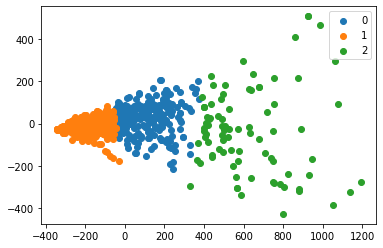

In [66]:
# reduce to two dimensions using pca
pca = PCA(2)
reduced_vec_list = pca.fit_transform(vec_list)

# perform kmeans on the reduced data
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(reduced_vec_list)

# plot clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(reduced_vec_list[label == i , 0] , reduced_vec_list[label == i , 1] , label = i)
plt.legend()
plt.show()